#  Análisis de Precios de Casas

---

##  Objetivo del dataset
- **Meta principal**: **Predecir el precio de venta de una casa (`SalePrice`)** en la ciudad de Ames (Iowa, EE.UU.).
- **Cómo se logra**: mediante modelos de **regresión múltiple** u otros algoritmos de Machine Learning, usando como insumo las características de la casa (tamaño, materiales, condiciones, ubicación, etc.).

---

##  Pasos para llegar al objetivo
1. **Cargar los datos**  
   - train.csv y test.csv

2. **Exploración de los datos (EDA)**  
   - Revisar registros, ver información básica

3. **Limpieza de datos**  
   - Imputar o eliminar valores faltantes (`NA`).
   - Solo eliminar valores nulos

4. **Seleccionar variables**  
   - Solo 3 variables numéricas.

5. **Dividir los Datos**  
   - Aplicar sobre variables numéricas cuando el modelo lo requiera.
   - 70% entrenar, 30% probar.

6. **Crear el modelo**  
   - Regresión lineal básica.

7. **Construcción del modelo**  
   - Empezar con **Regresión Lineal Múltiple**.
  

8. **Evaluación del modelo**  
- **RMSE (Root Mean Squared Error):** mide el error promedio, penaliza más los errores grandes.  
- **MAE (Mean Absolute Error):** error promedio absoluto entre lo real y lo predicho.  
- **R² (Coeficiente de determinación):** indica qué tan bien el modelo explica la variabilidad (0 a 1).  
- **Validación cruzada:** divide los datos en partes para entrenar y probar el modelo de forma más robusta.  


9. **Interpretación de resultados**  
   - Identificar qué variables influyen más en el precio de venta.


10. **Hacer predicciones**  
- Generar archivo CSV

11. **Evaluar**  
- Ver la opcion mas adecuada y correcta


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cargar datos
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(f"Datos cargados: {train.shape[0]} entrenamiento, {test.shape[0]} prueba")
print(f"Precio promedio: ${train['SalePrice'].mean():,.0f}")

# Selección de variables
features = ['GrLivArea', 'OverallQual', 'YearBuilt']
X = train[features].fillna(0)
y = train['SalePrice']

# División de datos
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)

# Entrenamiento
model = LinearRegression().fit(X_train, y_train)

# Evaluación
y_pred = model.predict(X_val)
print(f"RMSE: ${np.sqrt(mean_squared_error(y_val, y_pred)):,.0f}")
print(f"R²: {r2_score(y_val, y_pred):.2%}")

# Predicción final
X_test = test[features].fillna(0)
preds = model.predict(X_test)

# Guardar resultados
pd.DataFrame({'Id': test['Id'], 'SalePrice': preds}).to_csv('predicciones.csv', index=False)
print("Archivo 'predicciones.csv' guardado. Primeras 3 predicciones:")
print(pd.DataFrame({'Id': test['Id'], 'SalePrice': preds}).head(3))

Datos cargados: 1460 entrenamiento, 1459 prueba
Precio promedio: $180,921
RMSE: $44,532
R²: 70.79%
Archivo 'predicciones.csv' guardado. Primeras 3 predicciones:
     Id      SalePrice
0  1461  107437.758295
1  1462  158871.128684
2  1463  176031.422643


## Prediccion
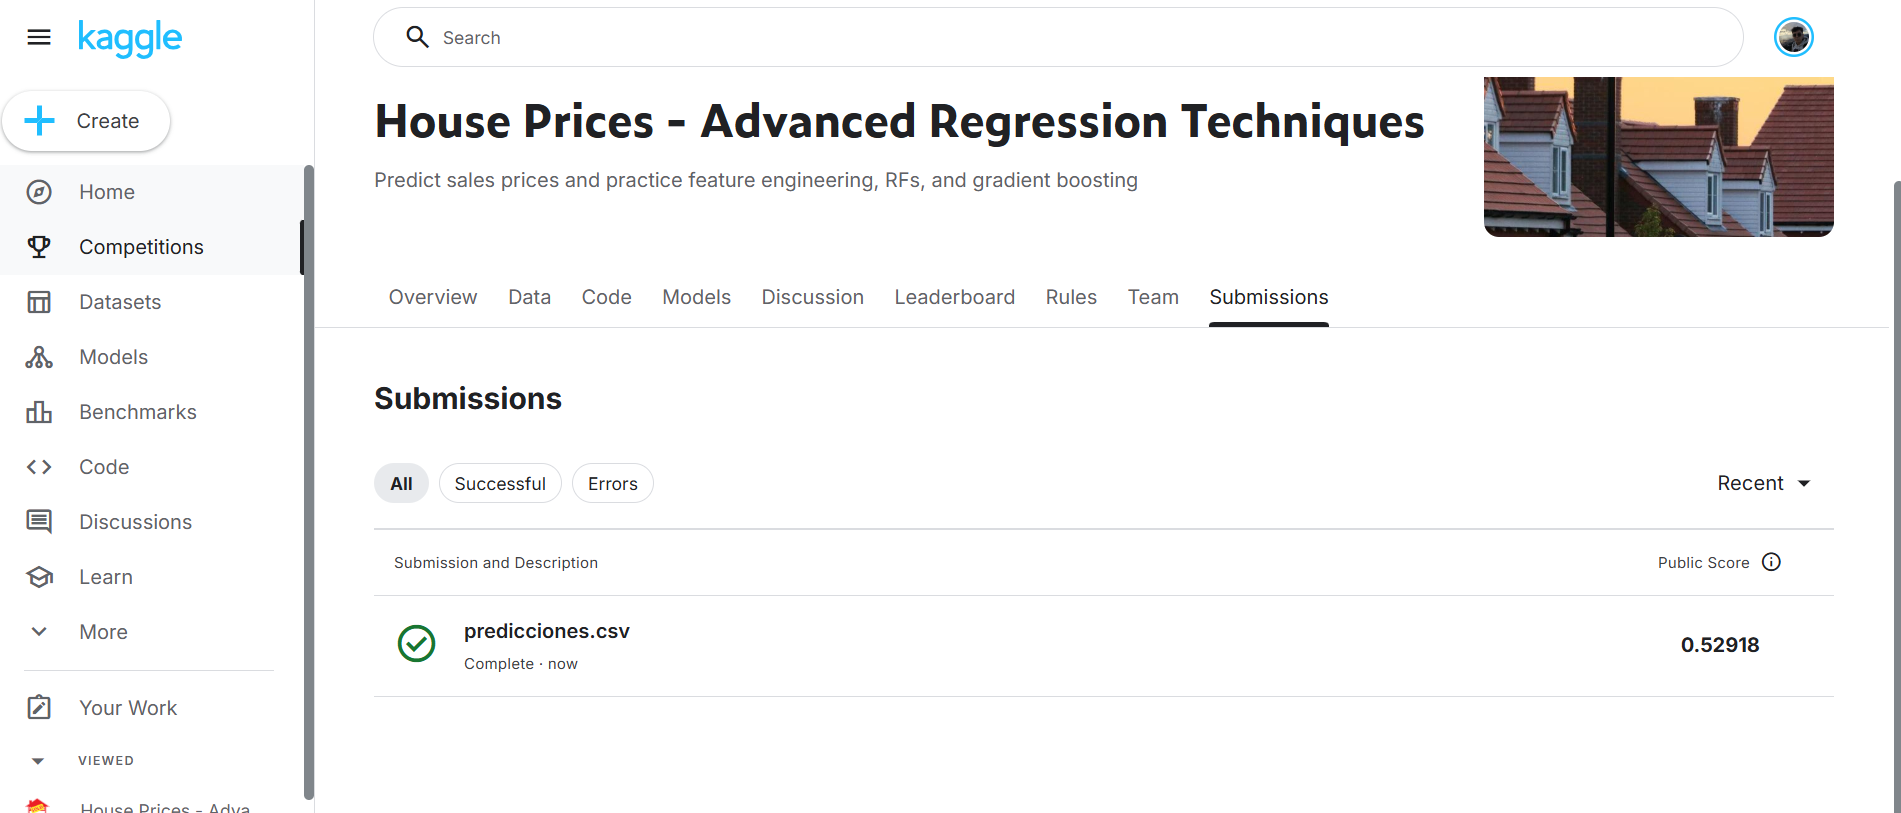